Directories

In [1]:
import os

BASE_DIR = os.getcwd()
MAPS_DIR = os.path.join(BASE_DIR, "..", "mappings")

Imports

In [2]:
from eda import EDA
from etl import ETLPipeline
from feature_eng import FeatureEngineer

ETL Pipeline

In [3]:
etl = ETLPipeline()

etl.extract("ruchi798/data-science-job-salaries", "ds_salaries.csv")
etl.extract("sazidthe1/data-science-salaries", "data_science_salaries.csv")
etl.extract("arnabchaki/data-science-salaries-2025", "salaries.csv")

etl.transform(
    columns_map=os.path.join(MAPS_DIR, "columns.json"),
    values_map=os.path.join(MAPS_DIR, "values.json"),
)

dataset = etl.load()

Transforming: 100%|██████████| 3/3 [00:00<00:00, 14.23it/s]


EDA

Missing values or NaNs: 0
Data dimensions (w x h): 59,174 x 11

                    unique_values
salary_in_usd               10537
salary                       9484
job_title                     363
employee_residence             98
company_location               92
salary_currency                27
experience_level                8
work_year                       6
employment_type                 4
work_model                      4
company_size                    3

                    mean        std     min      25%       50%       75%  \
work_year        2024.05       0.86  2020.0   2024.0    2024.0    2025.0   
salary         163579.02  332888.92  4000.0  96600.0  140000.0  192000.0   
salary_in_usd  150839.61   77184.20  2859.0  96153.0  139171.5  190000.0   

                      max  
work_year          2025.0  
salary         30400000.0  
salary_in_usd    800000.0  

                   unique             top   freq
experience_level        8          Senior  27758
employment_

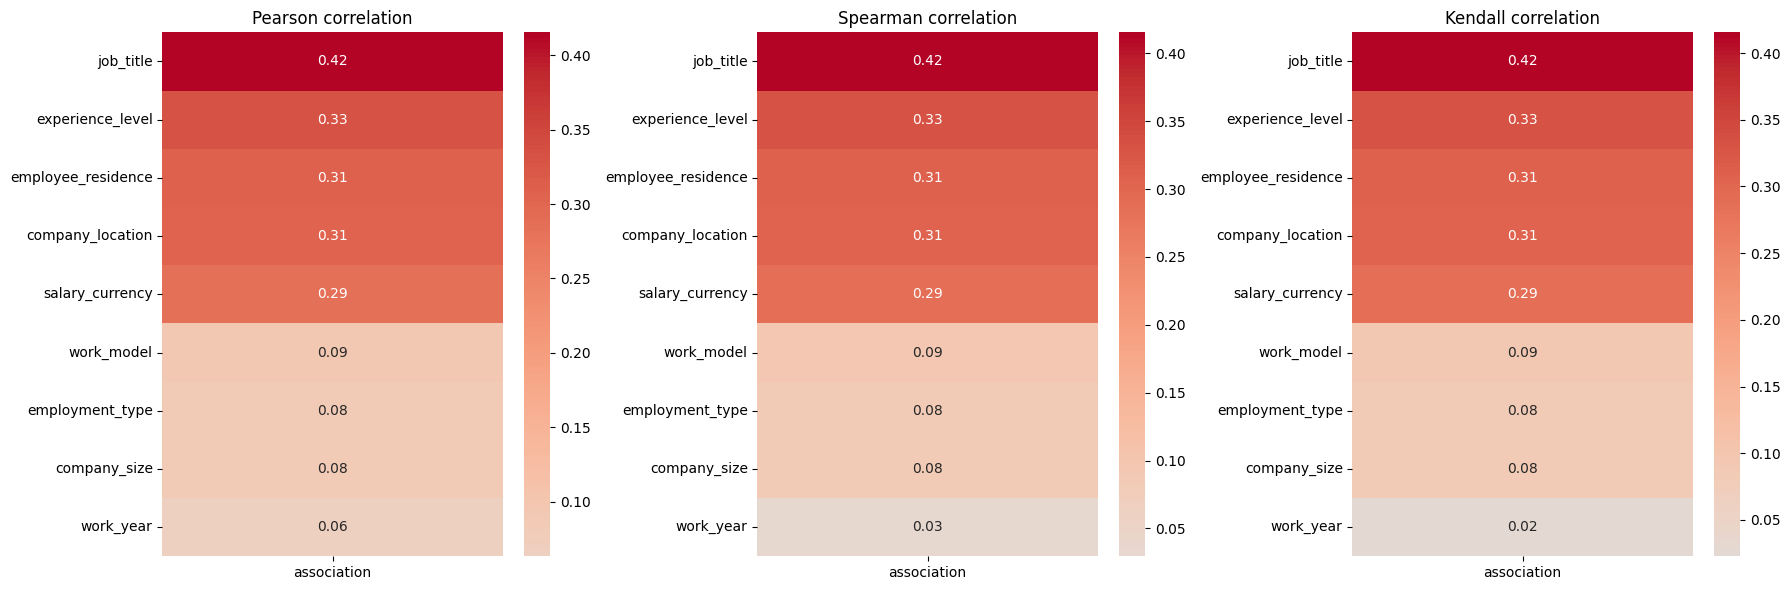

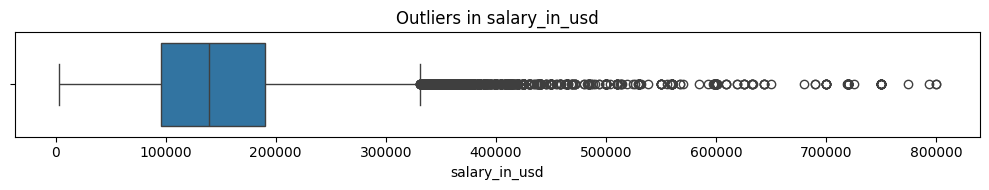

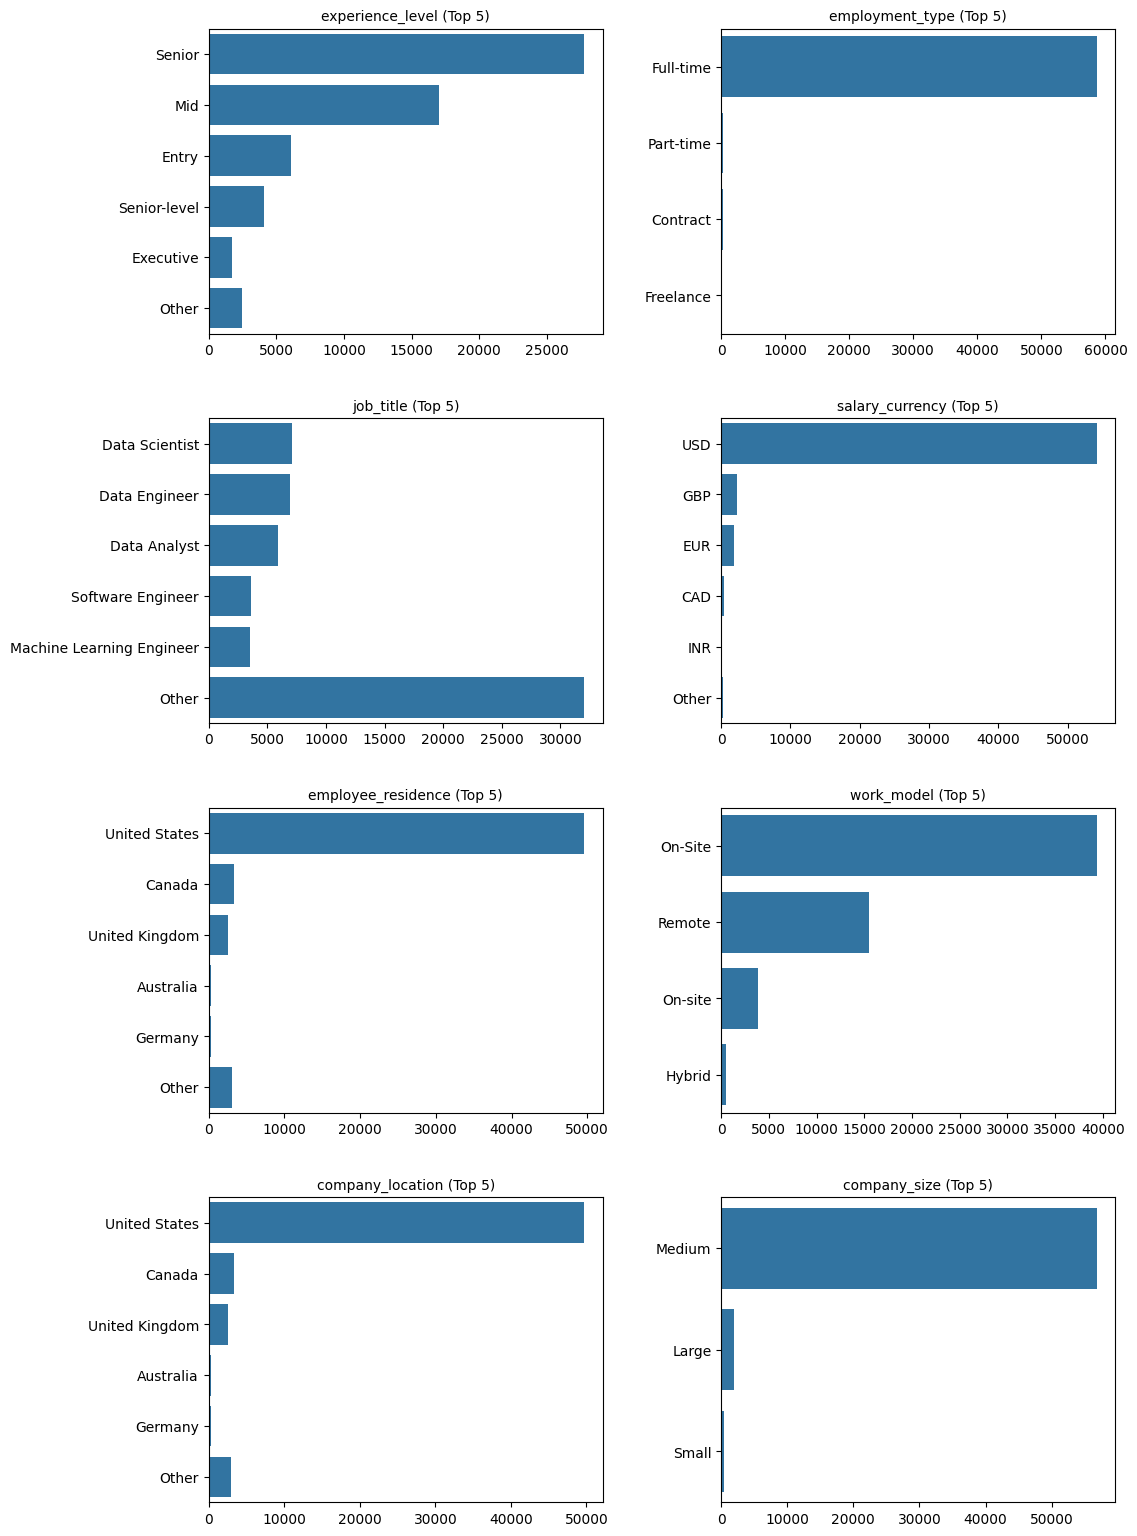

In [4]:
eda = EDA(dataset)
eda.describe()
eda.correlations(target="salary_in_usd", exclude_cols=["salary"])
eda.outliers(exclude_cols=["work_year", "salary"], top_n=5)

Feature engineering

In [ ]:
eng = FeatureEngineer(dataset)
eng.cleanup()
eng.prepare()
eng.cluster_careers(os.path.join(MAPS_DIR, "topics.json"))
eng.print_examples(n = 10)

Device set to use cuda:0
Zero-shot scoring: 100%|██████████| 345/345 [00:18<00:00, 18.16it/s]

Data Analyst                   | p_ai=0.01, p_data=0.95, p_software=0.00, p_academic=0.00
Research Analyst               | p_ai=0.25, p_data=0.00, p_software=0.00, p_academic=0.55
Engineering Manager            | p_ai=0.00, p_data=0.31, p_software=0.03, p_academic=0.00
Data Analyst                   | p_ai=0.01, p_data=0.95, p_software=0.00, p_academic=0.00
Product Owner                  | p_ai=0.01, p_data=0.69, p_software=0.13, p_academic=0.15
AI Engineer                    | p_ai=0.85, p_data=0.71, p_software=0.12, p_academic=0.05
Data Engineer                  | p_ai=0.05, p_data=0.95, p_software=0.32, p_academic=0.00
Software Engineer              | p_ai=0.00, p_data=0.37, p_software=0.83, p_academic=0.00
Engineer                       | p_ai=0.68, p_data=0.78, p_software=0.29, p_academic=0.00
Data Operations                | p_ai=0.03, p_data=0.33, p_software=0.02, p_academic=0.01
Data Analyst                   | p_ai=0.01, p_data=0.95, p_software=0.00, p_academic=0.00
Data Scien